<a href="https://colab.research.google.com/github/CescaNeri/ML-stocks-prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages

We start by installing and importing the packages that we will need later on.

In [1]:
%pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 239.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 226.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 170.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
 

In [2]:
%pip install finta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from finta import TA

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from numpy.core.arrayprint import format_float_scientific
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

## Data Acquisition

We import data directly from Yahoo Finance through the `yfinance` API just by indicating the name of the stock.

By selecting the period as *max*, the method `history()` will import all the available data about NVDA, from the oldest to the latest. 

In [5]:
np.random.seed(1821)

In [6]:
stock = 'NVDA'

nvidia = yf.Ticker(stock)
nvidia = nvidia.history(period='max')

nvidia

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.401517,0.448121,0.356107,0.376422,271468800,0.0,0.0
1999-01-25 00:00:00-05:00,0.406296,0.420636,0.376422,0.415856,51048000,0.0,0.0
1999-01-26 00:00:00-05:00,0.420636,0.429001,0.377617,0.383592,34320000,0.0,0.0
1999-01-27 00:00:00-05:00,0.384787,0.394347,0.363277,0.382397,24436800,0.0,0.0
1999-01-28 00:00:00-05:00,0.382397,0.384787,0.378811,0.381202,22752000,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-30 00:00:00-05:00,143.339996,146.289993,142.330002,146.139999,31027300,0.0,0.0
2023-01-03 00:00:00-05:00,148.509995,149.960007,140.960007,143.149994,40127700,0.0,0.0
2023-01-04 00:00:00-05:00,145.669998,148.529999,142.410004,147.490005,43132400,0.0,0.0


## Model n°1 - Bitcoin

NVIDIA GPUs are excellent graphic cards for **crypto mining**. Following this idea, we want to see whether the trend of the NVIDIA stock can be predicted by including in the model the trend of one of the most popular cryptocurrency: **Bitcoin**. 

We start by importing all the available historical data  about bitcoin from Yahoo Finance. 

In [7]:
bitcoin = yf.Ticker('BTC')
bitcoin = bitcoin.history(period='max')

In [8]:
bitcoin

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2020-10-01 00:00:00-04:00,100.000000,100.000000,100.000000,100.000000,0,0.0,0.0,0.0
2020-10-02 00:00:00-04:00,100.000000,100.000000,100.000000,100.000000,0,0.0,0.0,0.0
2020-10-05 00:00:00-04:00,100.029999,100.040001,99.995003,99.995003,10725,0.0,0.0,0.0
2020-10-06 00:00:00-04:00,100.010002,100.029999,100.010002,100.029999,10080,0.0,0.0,0.0
2020-10-07 00:00:00-04:00,99.949997,99.959999,99.919998,99.919998,6350,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-12-29 00:00:00-05:00,90.592300,90.592300,90.592300,90.592300,84,0.0,0.0,0.0
2022-12-30 00:00:00-05:00,90.431702,90.431702,90.431702,90.431702,33,0.0,0.0,0.0
2023-01-03 00:00:00-05:00,90.591003,90.618797,90.570000,90.618797,1715,0.0,0.0,0.0


In [9]:
print(len(bitcoin))

570


In [10]:
nvidia.index

DatetimeIndex(['1999-01-22 00:00:00-05:00', '1999-01-25 00:00:00-05:00',
               '1999-01-26 00:00:00-05:00', '1999-01-27 00:00:00-05:00',
               '1999-01-28 00:00:00-05:00', '1999-01-29 00:00:00-05:00',
               '1999-02-01 00:00:00-05:00', '1999-02-02 00:00:00-05:00',
               '1999-02-03 00:00:00-05:00', '1999-02-04 00:00:00-05:00',
               ...
               '2022-12-22 00:00:00-05:00', '2022-12-23 00:00:00-05:00',
               '2022-12-27 00:00:00-05:00', '2022-12-28 00:00:00-05:00',
               '2022-12-29 00:00:00-05:00', '2022-12-30 00:00:00-05:00',
               '2023-01-03 00:00:00-05:00', '2023-01-04 00:00:00-05:00',
               '2023-01-05 00:00:00-05:00', '2023-01-06 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=6030, freq=None)

### Data Understanding

We plot the trend of the nvidia stock over the last 300 trading days and we compare it with the trend of bitcoin over the same period in order spot similarities and commonalities.

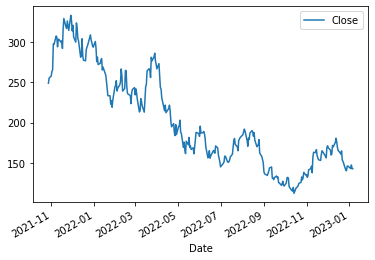

In [11]:
nvidia.iloc[-300:].plot.line(y='Close', use_index=True)

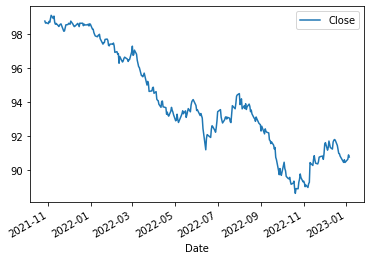

In [12]:
bitcoin.iloc[-300:].plot.line(y='Close', use_index=True)

### ETL

We clean data by eliminating useless columns (dividends and stock splits) and we create a new column `t1` which stores the closing price of the stock on the day after.

In [13]:
del nvidia['Dividends']
del nvidia['Stock Splits']

In [14]:
nvidia['t1'] = nvidia['Close'].shift(-1)

In [15]:
nvidia

,Open,High,Low,Close,Volume,t1
Date,,,,,,
1999-01-22 00:00:00-05:00,0.401517,0.448121,0.356107,0.376422,271468800,0.415856
1999-01-25 00:00:00-05:00,0.406296,0.420636,0.376422,0.415856,51048000,0.383592
1999-01-26 00:00:00-05:00,0.420636,0.429001,0.377617,0.383592,34320000,0.382397
1999-01-27 00:00:00-05:00,0.384787,0.394347,0.363277,0.382397,24436800,0.381202
1999-01-28 00:00:00-05:00,0.382397,0.384787,0.378811,0.381202,22752000,0.363277
...,...,...,...,...,...,...
2022-12-30 00:00:00-05:00,143.339996,146.289993,142.330002,146.139999,31027300,143.149994
2023-01-03 00:00:00-05:00,148.509995,149.960007,140.960007,143.149994,40127700,147.490005
2023-01-04 00:00:00-05:00,145.669998,148.529999,142.410004,147.490005,43132400,142.649994


### Target

We add the column `Target` which takes value 0 and 1. 

- When the closing price during time *t1* is higher than the closing price on *t*, the target value will be one: **buy**
- When the closing price during time *t1* is lower than the closing price in *t*, the target value will be zero: **sell**

In [16]:
nvidia['Target'] = (nvidia['t1'] > nvidia['Close']).astype(int)

In [17]:
nvidia

,Open,High,Low,Close,Volume,t1,Target
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.401517,0.448121,0.356107,0.376422,271468800,0.415856,1
1999-01-25 00:00:00-05:00,0.406296,0.420636,0.376422,0.415856,51048000,0.383592,0
1999-01-26 00:00:00-05:00,0.420636,0.429001,0.377617,0.383592,34320000,0.382397,0
1999-01-27 00:00:00-05:00,0.384787,0.394347,0.363277,0.382397,24436800,0.381202,0
1999-01-28 00:00:00-05:00,0.382397,0.384787,0.378811,0.381202,22752000,0.363277,0
...,...,...,...,...,...,...,...
2022-12-30 00:00:00-05:00,143.339996,146.289993,142.330002,146.139999,31027300,143.149994,0
2023-01-03 00:00:00-05:00,148.509995,149.960007,140.960007,143.149994,40127700,147.490005,1
2023-01-04 00:00:00-05:00,145.669998,148.529999,142.410004,147.490005,43132400,142.649994,0


### Merge data

We create a unique dataframe containing data both from NVIDIA and bitcoin.

In [18]:
bitcoin.rename(columns = {'Close': 'Close_B', 'High': 'High_B', 'Low': 'Low_B', 
                       'Adj Close': 'Adj Close_B', 'Volume': 'Volume_B', 'Open': 'Open_B'}, 
            inplace = True)

In [19]:
bitcoin['t1_B'] = bitcoin['Close_B'].shift(-1)

In [20]:
bitcoin['Target_B'] = (bitcoin['t1_B'] > bitcoin['Close_B']).astype(int)

In [21]:
del bitcoin['Dividends']
del bitcoin['Stock Splits']

In [22]:
bitcoin

,Open_B,High_B,Low_B,Close_B,Volume_B,Capital Gains,t1_B,Target_B
Date,,,,,,,,
2020-10-01 00:00:00-04:00,100.000000,100.000000,100.000000,100.000000,0,0.0,100.000000,0
2020-10-02 00:00:00-04:00,100.000000,100.000000,100.000000,100.000000,0,0.0,99.995003,0
2020-10-05 00:00:00-04:00,100.029999,100.040001,99.995003,99.995003,10725,0.0,100.029999,1
2020-10-06 00:00:00-04:00,100.010002,100.029999,100.010002,100.029999,10080,0.0,99.919998,0
2020-10-07 00:00:00-04:00,99.949997,99.959999,99.919998,99.919998,6350,0.0,99.995003,1
...,...,...,...,...,...,...,...,...
2022-12-29 00:00:00-05:00,90.592300,90.592300,90.592300,90.592300,84,0.0,90.431702,0
2022-12-30 00:00:00-05:00,90.431702,90.431702,90.431702,90.431702,33,0.0,90.618797,1
2023-01-03 00:00:00-05:00,90.591003,90.618797,90.570000,90.618797,1715,0.0,90.879204,1


In [23]:
nvidia = nvidia.merge(bitcoin, how='inner', on='Date')

In [24]:
nvidia

,Open,High,Low,Close,Volume,t1,Target,Open_B,High_B,Low_B,Close_B,Volume_B,Capital Gains,t1_B,Target_B
Date,,,,,,,,,,,,,,,
2020-10-01 00:00:00-04:00,137.290961,137.338362,134.324702,135.858978,52500400,130.348068,0,100.000000,100.000000,100.000000,100.000000,0,0.0,100.000000,0
2020-10-02 00:00:00-04:00,131.972151,134.910971,130.235802,130.348068,55249600,136.138412,1,100.000000,100.000000,100.000000,100.000000,0,0.0,99.995003,0
2020-10-05 00:00:00-04:00,132.081949,136.155878,131.949720,136.138412,47982000,137.076416,1,100.029999,100.040001,99.995003,99.995003,10725,0.0,100.029999,1
2020-10-06 00:00:00-04:00,138.009449,141.122890,136.362907,137.076416,78442000,139.346634,1,100.010002,100.029999,100.010002,100.029999,10080,0.0,99.919998,0
2020-10-07 00:00:00-04:00,139.703381,140.895878,138.343740,139.346634,41808400,138.096741,0,99.949997,99.959999,99.919998,99.919998,6350,0.0,99.995003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 00:00:00-05:00,144.020004,146.830002,142.270004,146.029999,35492300,146.139999,1,90.592300,90.592300,90.592300,90.592300,84,0.0,90.431702,0
2022-12-30 00:00:00-05:00,143.339996,146.289993,142.330002,146.139999,31027300,143.149994,0,90.431702,90.431702,90.431702,90.431702,33,0.0,90.618797,1
2023-01-03 00:00:00-05:00,148.509995,149.960007,140.960007,143.149994,40127700,147.490005,1,90.591003,90.618797,90.570000,90.618797,1715,0.0,90.879204,1


### Model

Now that we have merged data on a single dataframe, we are ready to run our **predictive model**.

In [25]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [26]:
nvidia = nvidia.dropna()

In [27]:
print(nvidia.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 't1', 'Target', 'Open_B',
       'High_B', 'Low_B', 'Close_B', 'Volume_B', 'Capital Gains', 't1_B',
       'Target_B'],
      dtype='object')


In [28]:
nvidia = shuffle(nvidia)
train = nvidia.iloc[:int(0.75*len(nvidia))]
test = nvidia.iloc[int(0.75*len(nvidia)):]

predictors = ['Open', 'High', 'Low', 'Close', 'Volume', 't1', 'Open_B',
       'High_B', 'Low_B', 'Close_B', 'Volume_B', 't1_B', 'Target_B']

model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [29]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)

In [30]:
precision_score(test['Target'], preds)

0.6271186440677966

## Model n°2 - Technical Indicators

We will use some technical indicators, implemented in Pandas through the `FinTA` library, to better predict the behavior of the NVIDIA stock.

In [31]:
stock = 'NVDA'

nvidia = yf.Ticker(stock)
nvidia = nvidia.history(period='max')

nvidia

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.401517,0.448121,0.356107,0.376422,271468800,0.0,0.0
1999-01-25 00:00:00-05:00,0.406296,0.420636,0.376422,0.415856,51048000,0.0,0.0
1999-01-26 00:00:00-05:00,0.420636,0.429002,0.377617,0.383592,34320000,0.0,0.0
1999-01-27 00:00:00-05:00,0.384787,0.394347,0.363277,0.382397,24436800,0.0,0.0
1999-01-28 00:00:00-05:00,0.382397,0.384787,0.378811,0.381202,22752000,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-30 00:00:00-05:00,143.339996,146.289993,142.330002,146.139999,31027300,0.0,0.0
2023-01-03 00:00:00-05:00,148.509995,149.960007,140.960007,143.149994,40127700,0.0,0.0
2023-01-04 00:00:00-05:00,145.669998,148.529999,142.410004,147.490005,43132400,0.0,0.0


In [32]:
nvidia['t1'] = nvidia['Close'].shift(-1)

In [33]:
nvidia['Target'] = (nvidia['t1'] > nvidia['Close']).astype(int)

In [34]:
del nvidia['Dividends']
del nvidia['Stock Splits']

In [35]:
nvidia

,Open,High,Low,Close,Volume,t1,Target
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.401517,0.448121,0.356107,0.376422,271468800,0.415856,1
1999-01-25 00:00:00-05:00,0.406296,0.420636,0.376422,0.415856,51048000,0.383592,0
1999-01-26 00:00:00-05:00,0.420636,0.429002,0.377617,0.383592,34320000,0.382397,0
1999-01-27 00:00:00-05:00,0.384787,0.394347,0.363277,0.382397,24436800,0.381202,0
1999-01-28 00:00:00-05:00,0.382397,0.384787,0.378811,0.381202,22752000,0.363277,0
...,...,...,...,...,...,...,...
2022-12-30 00:00:00-05:00,143.339996,146.289993,142.330002,146.139999,31027300,143.149994,0
2023-01-03 00:00:00-05:00,148.509995,149.960007,140.960007,143.149994,40127700,147.490005,1
2023-01-04 00:00:00-05:00,145.669998,148.529999,142.410004,147.490005,43132400,142.649994,0


### Smooth Data

To calculate indicators in a more accurate way, we need to remove noise by **smoothing** data with a simple function.
The purpose of this function is to ignore one-time *outliers* and take into account the effects of *seasonality* on the stock.

In [36]:
def smooth_data(data, alpha):
  return data.ewm(alpha=alpha).mean()

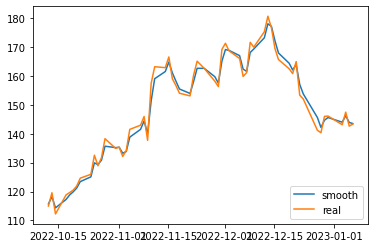

In [37]:
alpha = 0.65
data = smooth_data(nvidia, alpha)

smooth_trend = data.iloc[-60:]['Close']
real_trend = nvidia.iloc[-60:]['Close']

plt.plot(smooth_trend)
plt.plot(real_trend)

plt.legend(["smooth", "real"], loc ="lower right")
plt.show()

### Financial Indicators

The FinTA library expects properly formatted DataFrames, with column names in lowercase: ["open", "high", "low", "close", "volume"]

In [38]:
data.rename(columns = {'Close': 'close', 'High': 'high', 'Low': 'low', 
                       'Adj Close': 'adj close', 'Volume': 'volume', 'Open': 'open'}, 
            inplace = True)

We choose the following indicators:

- **OBV**: On Balance Volume
- **ADL**: Accumulation Distribution Line
- **ADX**: Average Directional Index
- **RSI**: Relative Strenght Index
- **STOCH**: Stochastic Oscillator
- **SMA**: Simple Moving Average

In [39]:
indicators = ['OBV', 'ADL', 'ADX', 'RSI', 'STOCH', 'SMA']

In [ ]:
# indicators = ['RSI', 'STOCH', 'ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV']

In [ ]:
# indicators = ['SMA', 'SMM', 'SSMA', 'EMA', 'DEMA', 'TEMA', 'TRIMA', 'TRIX', 'VAMA', 'ER', 'KAMA', 
#              'ZLEMA', 'WMA', 'HMA', 'EVWMA', 'VWAP', 'SMMA', 'MOM', 'ROC', 'RSI', 'IFT_RSI']

In [40]:
for indicator in indicators:
  data[indicator] = eval('TA.' + indicator + '(data)')

In [41]:
print(data.columns)

Index(['open', 'high', 'low', 'close', 'volume', 't1', 'Target', 'OBV', 'ADL',
       'ADX', 'RSI', 'STOCH', 'SMA'],
      dtype='object')


In [42]:
print(nvidia.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 't1', 'Target'], dtype='object')


In [43]:
to_del = ['open', 'high', 'low', 'close', 'volume', 't1', 'Target']

In [44]:
for column in to_del:
  del data[column]

In [45]:
nvidia = nvidia.merge(data, how='inner', on='Date')

In [46]:
print(len(nvidia))

6030


In [47]:
nvidia = nvidia.dropna()

In [48]:
print(len(nvidia))

5989


In [49]:
nvidia

,Open,High,Low,Close,Volume,t1,Target,OBV,ADL,ADX,RSI,STOCH,SMA
Date,,,,,,,,,,,,,
1999-03-22 00:00:00-05:00,0.409882,0.411077,0.389567,0.389567,3667200,0.365667,0,2.132452e+07,-2.407830e+08,39.377710,47.304315,22.624687,0.392218
1999-03-23 00:00:00-05:00,0.391956,0.391956,0.358497,0.365667,16396800,0.363277,0,8.768430e+06,-2.486523e+08,37.734934,39.629822,9.472855,0.392193
1999-03-24 00:00:00-05:00,0.363277,0.365667,0.348937,0.363277,6086400,0.368057,1,4.176385e+05,-2.480554e+08,37.328458,36.823545,15.969219,0.391263
1999-03-25 00:00:00-05:00,0.362082,0.382397,0.360887,0.368057,4032000,0.400322,1,5.961215e+06,-2.491327e+08,36.505517,37.039955,16.475180,0.390707
1999-03-26 00:00:00-05:00,0.372837,0.401517,0.372837,0.400322,8827200,0.412272,1,1.363915e+07,-2.445306e+08,34.157429,48.373103,46.583362,0.390798
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 00:00:00-05:00,144.020004,146.830002,142.270004,146.029999,35492300,146.139999,1,1.956126e+10,4.400498e+09,27.470967,36.117471,9.514592,157.766653
2022-12-30 00:00:00-05:00,143.339996,146.289993,142.330002,146.139999,31027300,143.149994,0,1.959420e+10,4.421545e+09,27.371403,37.357041,11.723926,158.017976
2023-01-03 00:00:00-05:00,148.509995,149.960007,140.960007,143.149994,40127700,147.490005,1,1.955659e+10,4.411109e+09,26.769799,36.066215,7.939893,158.280231


In [50]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [51]:
print(nvidia.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 't1', 'Target', 'OBV', 'ADL',
       'ADX', 'RSI', 'STOCH', 'SMA'],
      dtype='object')


In [55]:
nvidia = shuffle(nvidia)
train = nvidia.iloc[:int(.8*len(nvidia))]
test = nvidia.iloc[int(.8*len(nvidia)):]

predictors = ['Open', 'High', 'Low', 'Close', 'Volume', 't1', 'OBV', 'ADL',
       'ADX', 'RSI', 'STOCH', 'SMA']

model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [56]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)

In [57]:
precision_score(test['Target'], preds)

0.5886426592797784

## Model n°3 - Linear Regression

We train a regression model using historic pricing data and technical indicators to make predictions on future prices. The goal is to find the right combination of features that maximizes the model accuracy.

In [62]:
#import pandas_ta as ta
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [63]:
stock = 'NVDA'

nvidia = yf.Ticker(stock)
nvidia = nvidia.history(period='max')

nvidia

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.401517,0.448121,0.356107,0.376422,271468800,0.0,0.0
1999-01-25 00:00:00-05:00,0.406296,0.420636,0.376422,0.415856,51048000,0.0,0.0
1999-01-26 00:00:00-05:00,0.420636,0.429001,0.377616,0.383592,34320000,0.0,0.0
1999-01-27 00:00:00-05:00,0.384787,0.394347,0.363277,0.382397,24436800,0.0,0.0
1999-01-28 00:00:00-05:00,0.382397,0.384787,0.378811,0.381202,22752000,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-30 00:00:00-05:00,143.339996,146.289993,142.330002,146.139999,31027300,0.0,0.0
2023-01-03 00:00:00-05:00,148.509995,149.960007,140.960007,143.149994,40127700,0.0,0.0
2023-01-04 00:00:00-05:00,145.669998,148.529999,142.410004,147.490005,43132400,0.0,0.0


In [64]:
print(nvidia.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6030 entries, 1999-01-22 00:00:00-05:00 to 2023-01-06 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6030 non-null   float64
 1   High          6030 non-null   float64
 2   Low           6030 non-null   float64
 3   Close         6030 non-null   float64
 4   Volume        6030 non-null   int64  
 5   Dividends     6030 non-null   float64
 6   Stock Splits  6030 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 505.9 KB
None


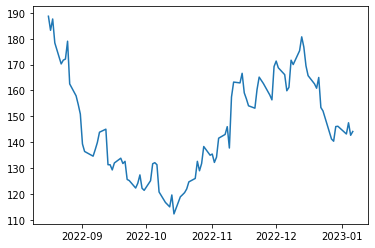

In [65]:
plt.plot(nvidia.iloc[-100:]['Close'])

We calculate the Exponential Moving Average (**EMA**) and we add it to the dataframe as a new column. The idea is to use this indicator to predict the nvidia stock prices.

In [66]:
nvidia['EMA'] = TA.EMA(nvidia)

In [67]:
to_del = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']

for col in to_del:
  del nvidia[col]

In [68]:
nvidia

,Close,EMA
Date,,
1999-01-22 00:00:00-05:00,0.376422,0.376422
1999-01-25 00:00:00-05:00,0.415856,0.398330
1999-01-26 00:00:00-05:00,0.383592,0.392290
1999-01-27 00:00:00-05:00,0.382397,0.388939
1999-01-28 00:00:00-05:00,0.381202,0.386637
...,...,...
2022-12-30 00:00:00-05:00,146.139999,151.205597
2023-01-03 00:00:00-05:00,143.149994,149.594476
2023-01-04 00:00:00-05:00,147.490005,149.173582


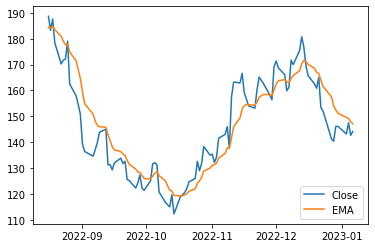

In [69]:
plt.plot(nvidia.iloc[-100:]['Close'])
plt.plot(nvidia.iloc[-100:]['EMA'])

plt.legend(["Close", "EMA"], loc ="lower right")
plt.show()

We divide the dataframe in train and test set following a 80/20 split using sklearn `train_test_split` method.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(nvidia[['Close']], nvidia[['EMA']], test_size=.2)

In [71]:
print(X_test.describe())
print(X_train.describe())

             Close
count  1206.000000
mean     30.461218
std      58.458709
min       0.313087
25%       2.481373
50%       3.986104
75%      34.138631
max     326.414795
             Close
count  4824.000000
mean     28.171175
std      56.011718
min       0.315477
25%       2.411968
50%       3.823585
75%      23.621374
max     333.407410


In [72]:
model = LinearRegression()

In [73]:
model.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = model.predict(X_test)

In [75]:
print('Model Coefficients: {}'.format(model.coef_))
print('Standard Deviation: {}'.format(np.std(y_pred)))
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('Coefficient of Determination: {}'.format(r2_score(y_test, y_pred)))

Model Coefficients: [[0.99397383]]
Standard Deviation: 58.08233183959083
Mean Absolute Error: 0.9787172458788739
Coefficient of Determination: 0.9974870637503259
